___
# MINIPROJETO 1
### <font color='red'>Martim Ferreira José</font>
## <font color='blue'>Quantidade de andares dos edifícios mais altos do mundo</font>
___

### Itens 1 a 3 - Resolução:

In [313]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import weibull_min
from scipy.stats import expon

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Martim\Dropbox\Insper\SegundoSemestre\CD\MiniProjeto1


In [314]:
dados = pd.read_table('tall_buildings_of_the_world.csv', sep=',')

In [315]:
datae = dados.loc[:, ("Height (ft)")]
altura = pd.Series(data=sorted(datae))

[792, 2800, 0, 0.0075]

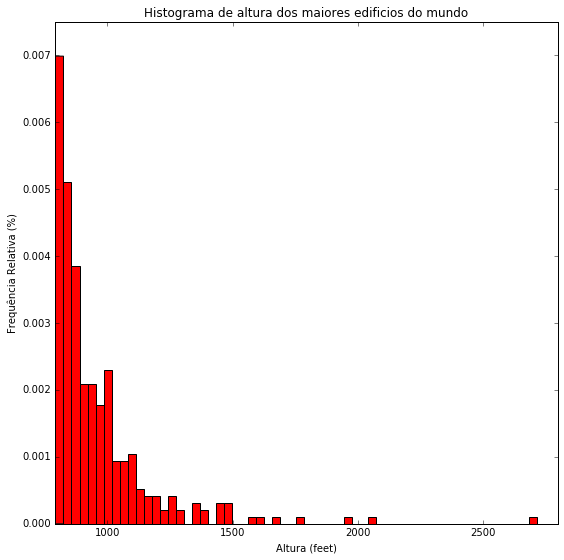

In [316]:
plot = altura.plot.hist(bins = 60, normed = True, color = "red", title= 'Histograma de altura dos maiores edificios do mundo', figsize=(9,9))
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Altura (feet)")
plt.axis([792, 2800, 0, 0.0075])

O histograma apresenta assimetria a direita.

___
### Itens 4 a 6 - Resolução:

### 4)
Para modelar essa variável quantitativa, será usado a distribuição exponencial e Weibull exponencial como distribuições teóricas, porque a distribuição dos dados assemelha-se muito a uma exponencial descrescente. 

### 5)

##### Exponencial
Os parâmetros usados na distribuição são a média e o desvio padrão, porém ao invés da média pode ser o valor de mínimo. O valor minimo é a altura mínima, que é 782 e o desvio padrão gira em torno de 200.


##### Weibull
Para termos uma Weibull exponencial, o parâmentro a ser usado sem ser a média e o desvio padrão, deve ser 1 ou menor que um. A média dos dados aparenta estar por volta dos 900 pés e o desvio padrão em 200.



### 6)

In [339]:
exp = stats.expon.fit(altura)
print("Os parâmentros utilizados na distribuição exponencial são:", altura.min(), "e", altura.std())

Os parâmentros utilizados na distribuição exponencial são: 792 e 215.57544275793597


In [341]:
print("Os parâmentros utilizados na distribuição de Weibull são:", altura.mean(), ",", altura.std(), "e", "1")

Os parâmentros utilizados na distribuição de Weibull são: 960.8695652173913 , 215.57544275793597 e 1


___
### Itens 7 a 9 - Resolução:

### 7)

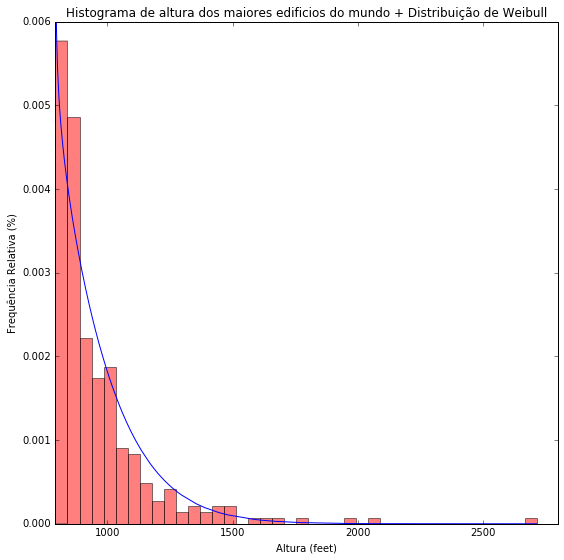

In [342]:
plt.plot(altura, stats.exponweib.pdf(altura, *stats.exponweib.fit(altura, 1, 1, loc=altura.mean(), scale=altura.std())))
plot = altura.plot.hist(bins = 40, normed = True, alpha = 0.5, color = "r", figsize = (9,9), title= 'Histograma de altura dos maiores edificios do mundo + Distribuição de Weibull')
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Altura (feet)")
plt.axis([792, 2800, 0, 0.006])
plt.show()

print("")

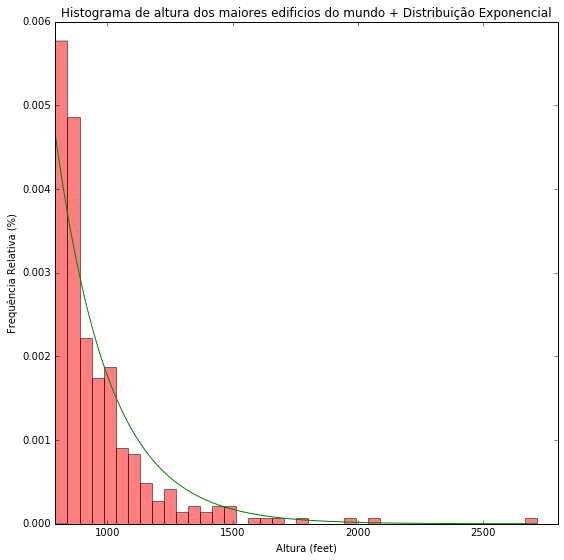

In [320]:
x = np.linspace(altura.min(), altura.max(), 1000)
exponencial = stats.expon.pdf(x, loc = altura.min(), scale=altura.std())
plt.plot(x, exponencial, '-', color='green')
plot = altura.plot.hist(bins = 40, normed = True, alpha = 0.5, color = "r", figsize = (9,9), title= 'Histograma de altura dos maiores edificios do mundo + Distribuição Exponencial')
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Altura (feet)")
plt.axis([792, 2800, 0, 0.006])
plt.show()

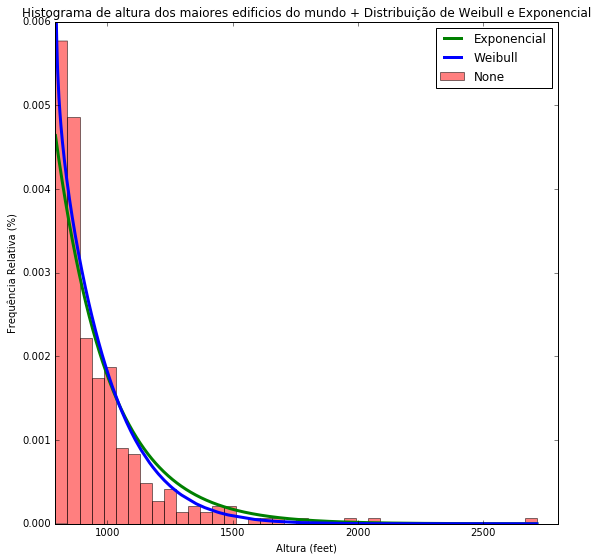

In [335]:
x = np.linspace(altura.min(), altura.max(), 1000)
exponencial = stats.expon.pdf(x, loc = altura.min(), scale=altura.std())
plt.plot(x, exponencial, '-', color='green', label="Exponencial", lw=3) # Plota a exponencial teórica

plt.plot(altura, stats.exponweib.pdf(altura, *stats.exponweib.fit(altura, 1, 1, loc=altura.mean(), scale=altura.std())),color='blue', label="Weibull", lw=3)

plot = altura.plot.hist(bins = 40, normed = True, alpha = 0.5, color = "r", figsize = (9,9), title= 'Histograma de altura dos maiores edificios do mundo + Distribuição de Weibull e Exponencial')
plt.ylabel("Frequência Relativa (%)")
plt.xlabel("Altura (feet)")
plt.axis([792, 2800, 0, 0.006])
plt.legend()
plt.show()

### 8)

Notamos no inicio, que os pontos estão bem acomodados à bissetriz, indicando que os valores observados e os teóricos apresentam um grau de concordância muito alto. Porém ao final da bissetriz essa concordância diminui e os a distribuição que melhor acomoda é a exponencial, pelos seus dados se encontrarem mais perto da bissetriz.


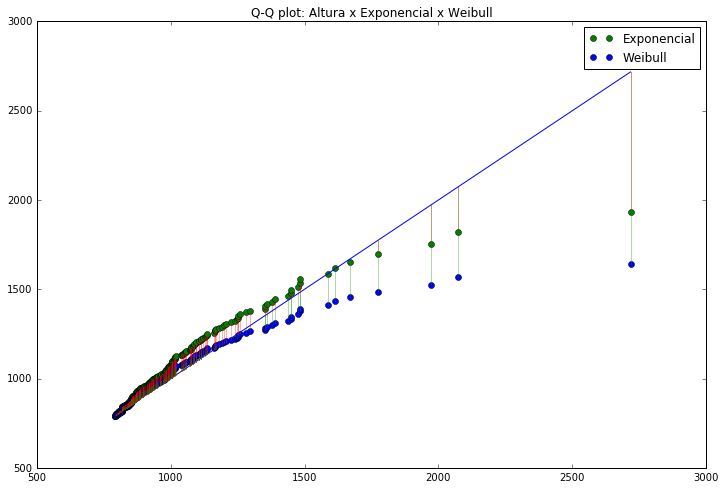

In [373]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(altura)):
    acc = (i - 0.5) / len(altura)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra, loc = altura.min(), scale=altura.std()) # quantis teóricos da exponencial
q_weibill = stats.exponweib.ppf(fra, *stats.exponweib.fit(altura, 1, 1, loc=altura.mean(), scale=altura.std()))


fig = plt.figure(figsize=(12,8))
plt.title("Q-Q plot: Altura x Exponencial x Weibull")

exp_plot, = plt.plot(altura, q_exp, 'o', color="g", label="Exponencial")
weibill_plot, = plt.plot(altura, q_weibill, 'o', color="b", label = "Weibull")

plt.legend(handles=[exp_plot, weibull_plot])
plt.plot((min(altura), max(altura)), (min(altura), max(altura)), '-')

for i in range(len(altura)):
    plt.plot((altura[i], altura[i]), (q_exp[i], altura[i]), '-', color='red', alpha=0.3  )
    plt.plot((altura[i], altura[i]), (q_weibull[i], altura[i]), '-', color='green', alpha=0.3  )

print("Notamos no inicio, que os pontos estão bem acomodados à bissetriz, indicando que os valores observados e os teóricos apresentam um grau de concordância muito alto. Porém ao final da bissetriz essa concordância diminui e os a distribuição que melhor acomoda é a exponencial, pelos seus dados se encontrarem mais perto da bissetriz.")

### 9) 

[]

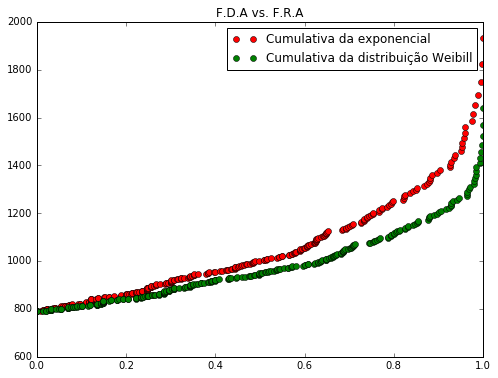

In [376]:
# Gera os valores dos quantis teóricos para as distribuições analisadas
cdf_exp = stats.expon.cdf(altura, loc = altura.min(), scale=altura.std())
cdf_weibill = stats.exponweib.cdf(altura, *stats.exponweib.fit(altura, 1, 1, loc=altura.mean(), scale=altura.std()))

fig = plt.figure(figsize=(8,6))

plt.title("F.D.A vs. F.R.A")

cdf_exp_plot,   = plt.plot(cdf_exp, q_exp, 'o', color='red', label = "Cumulativa da exponencial")
cdf_weibill_plot, = plt.plot(cdf_weibill, q_weibill, 'o', color='green', label = "Cumulativa da distribuição Weibill")

plt.legend(handles=[cdf_exp_plot, cdf_weibill_plot])
plt.plot()

___
### Itens 10 e 11 - Resolução:

### 10)

Pelo gráfico da frequência relativa acumulada vs. Cumulativa da distribuição Exponencial e Exponencial de Weibill, podemos observar que a Cumulativa de Weibill se aproxima muito mais dos dados do que a cumulativa exponencial


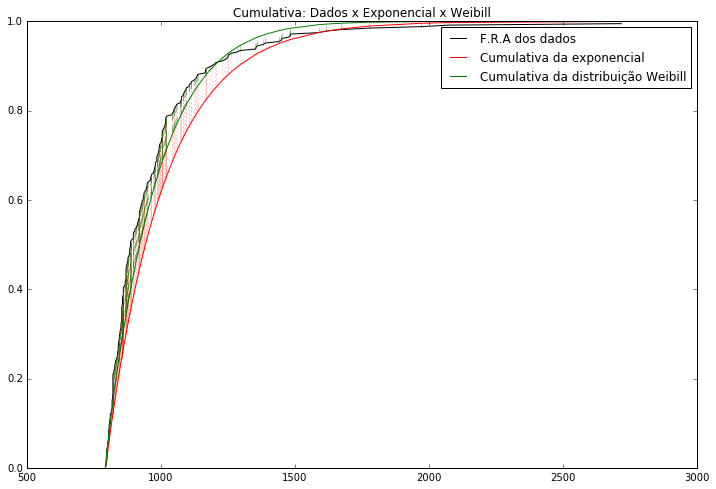

In [370]:
cdf_exp = stats.expon.cdf(altura, loc = altura.min(), scale=altura.std())
cdf_weibill = stats.exponweib.cdf(altura, *stats.exponweib.fit(altura, 1, 1, loc=altura.mean(), scale=altura.std()))

fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Weibill")

altura_fra_plot, = plt.plot(altura, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(altura, cdf_exp, '-', color='red', label = "Cumulativa da exponencial")
cdf_weibill_plot, = plt.plot(altura, cdf_weibill, '-', color='green', label = "Cumulativa da distribuição Weibill")

plt.legend(handles=[altura_fra_plot, cdf_exp_plot, cdf_weibill_plot])


for i in range(len(altura)):
    plt.plot((altura[i], altura[i]), (fra[i], cdf_exp[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((altura[i], altura[i]), (fra[i], cdf_weibill[i]), '--', color="green", alpha=0.3)

print("Pelo gráfico da frequência relativa acumulada vs. Cumulativa da distribuição Exponencial e Exponencial de Weibill, podemos observar que a Cumulativa de Weibill se aproxima muito mais dos dados do que a cumulativa exponencial")

In [359]:
soma_dif_cdf_weibill = sum(fra - cdf_weibill)
soma_dif_cdf_exp = sum(fra - cdf_exp)

print("Podemos confirmar a intuição de que a distribuição de Weibill se aproxima melhor dos dados pelo erro que ela tem em comparação com a Exponencial: \n")
print("Erro da soma das diferenças da Weibill vs. Frequência Relativa Acumulada (em módulo): {0} \nErro da soma das diferenças da Exponencial vs. Frequência Relativa Acumulada (em módulo): {1}\n".format(soma_dif_cdf_weibill, soma_dif_cdf_exp))

erro_quadratico_exponencial = sum((altura - q_exp)**2)
erro_quadratico_expwei = sum((altura - q_weibill)**2)

print("Erro quadrático da Exponencial: ",erro_quadratico_exponencial)
print("Erro quadrático da Exponencial Weibill:",erro_quadratico_expwei)

eqm_exp = erro_quadratico_exponencial/len(altura)
eqm_gamma = erro_quadratico_expwei/len(altura)

print("")
print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da exponencial de Weibill :", eqm_gamma)

soma_diferenças_exponencial = sum(abs(altura - q_exp))
soma_diferenças_gamma = sum(abs(altura - q_weibill))

print("")
print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da Exponencial Weibill :", soma_diferenças_gamma)

print("")
erro_quad_cdf_exponencial = sum((fra - cdf_exp)**2)
erro_quad_cdf_gamma = sum((fra - cdf_weibill)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Weibill versus F.R.A", erro_quad_cdf_gamma)


Podemos confirmar a intuição de que a distribuição de Weibill se aproxima melhor dos dados pelo erro que ela tem em comparação com a Exponencial: 

Erro da soma das diferenças da Weibill vs. Frequência Relativa Acumulada (em módulo): 12.74285591513315 
Erro da soma das diferenças da Exponencial vs. Frequência Relativa Acumulada (em módulo): 24.97590393261134

Erro quadrático da Exponencial:  1685626.96492
Erro quadrático da Exponencial Weibill: 289906712.0

Erro quadratico médio da exponencial : 5637.54837767
Erro quadratico médio da exponencial de Weibill : 969587.665552

Soma de diferenças da exponencial : 15222.9026287
Soma de diferenças da Exponencial Weibill : 287300.0

Erro quadrático da CDF da Exponencial versus F.R.A 2.67610711757
Erro quadrático da CDF da Weibill versus F.R.A 0.883613816684


In [362]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exp))
ks_aderencia_weibill = max(abs(fra-cdf_weibill))


print("Teste K-S para a exponencial:",ks_aderencia_exp,"\nTeste K-S para a Weibill",ks_aderencia_weibill)

Teste K-S para a exponencial: 0.153279373438 
Teste K-S para a Weibill 0.106853082686


### 11)

In [372]:
df = pd.DataFrame({"Altura" : altura,
                  "Exponencial" : q_exp,
                  "Weibill" : q_weibill,
                  "Erro quadrático da CDF na Exponencial" : erro_quad_cdf_exponencial,
                  "Erro quadrático da CDF na Exponencial Weibill" : erro_quad_cdf_gamma
                   })
df.head()


,Altura,Erro quadrático da CDF na Exponencial,Erro quadrático da CDF na Exponencial Weibill,Exponencial,Weibill
0,792,2.676107,0.883614,792.000000,0.0
1,792,2.676107,0.883614,792.360796,0.0
2,794,2.676107,0.883614,793.084204,0.0
3,795,2.676107,0.883614,793.810048,0.0
4,795,2.676107,0.883614,794.538344,0.0
